# COVID-19 in Los Angeles County

Data courtesy Los Angeles County Department of Public Health.
The archived daily press releases can be found [here](http://publichealth.lacounty.gov/phcommon/public/media/mediaCOVIDdisplay.cfm?unit=media&ou=ph&prog=media)

**Last Update:** Thursday, June 4

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import gla_covid_19.analyze_lacph_daily as analyze_lacph_daily
import gla_covid_19.lacph_const as lacph_const
import gla_covid_19.lacph_prid as lacph_prid
import gla_covid_19.scrape_lacph_daily as scrape_lacph_daily

sns.set()

all_dates = tuple(map(lambda x: scrape_lacph_daily.query_single_date(x), lacph_prid.DAILY_STATS))

## Key Statistics

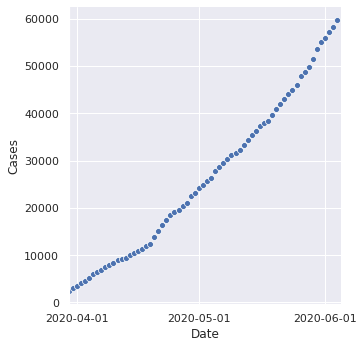

In [20]:
summary_stats = analyze_lacph_daily.make_df_dates(all_dates)

g = sns.relplot(x=lacph_const.DATE, y=lacph_const.CASES, data=summary_stats)
plt.xlim(pd.to_datetime('2020-03-30'), pd.to_datetime('2020-06-05'))
plt.xticks((pd.to_datetime('2020-04-01'), pd.to_datetime('2020-05-01'), pd.to_datetime('2020-06-01')))
plt.show()

In [4]:
summary_stats.head()

,Date,Cases,Hospitalizations,Deaths
0,2020-03-30,2474,492,44
1,2020-03-31,3011,594,54
2,2020-04-01,3518,733,65
3,2020-04-02,4045,879,78
4,2020-04-03,4566,1018,89


In [9]:
df = pd.melt(summary_stats, id_vars='Date', var_name='Statistic', value_name='Count')

In [11]:
df['Statistic'] = df['Statistic'].astype('category')

In [12]:
df.dtypes

Date         datetime64[ns]
Statistic          category
Count                 int64
dtype: object

In [17]:
critical = df[df['Statistic'] != 'Cases']
critical.head()

,Date,Statistic,Count
67,2020-03-30,Hospitalizations,492
68,2020-03-31,Hospitalizations,594
69,2020-04-01,Hospitalizations,733
70,2020-04-02,Hospitalizations,879
71,2020-04-03,Hospitalizations,1018


([<matplotlib.axis.XTick at 0x7fd71dc15910>,
 <a list of 3 Text major ticklabel objects>)

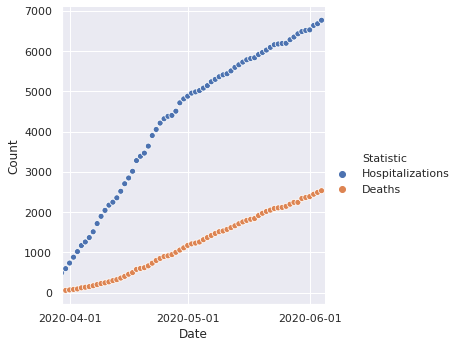

In [21]:
sns.relplot(x='Date', y='Count', hue='Statistic', data=critical)
plt.xlim(pd.to_datetime('2020-03-30'), pd.to_datetime('2020-06-05'))
plt.xticks((pd.to_datetime('2020-04-01'), pd.to_datetime('2020-05-01'), pd.to_datetime('2020-06-01')))t

In [22]:
by_age = analyze_lacph_daily.make_by_age(all_dates)

In [23]:
by_age.head()

,Date,0 to 17,18 to 40,41 to 65,over 65
0,2020-03-30,37,918,943,467
1,2020-03-31,27,1101,1172,553
2,2020-04-01,32,1228,1399,669
3,2020-04-02,36,1385,1630,787
4,2020-04-03,40,1538,1859,907


In [26]:
by_age = pd.melt(by_age, id_vars='Date', var_name='Age Group', value_name='Cases')

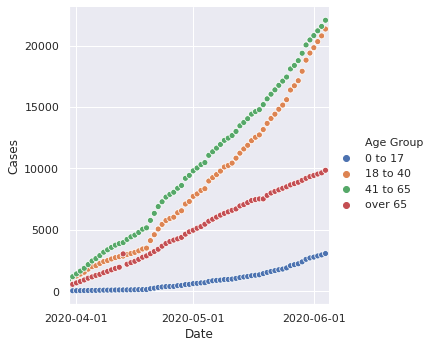

In [29]:
sns.relplot(x='Date', y='Cases', hue='Age Group', data=by_age)
plt.xlim(pd.to_datetime('2020-03-30'), pd.to_datetime('2020-06-05'))
plt.xticks((pd.to_datetime('2020-04-01'), pd.to_datetime('2020-05-01'), pd.to_datetime('2020-06-01')))
plt.show()